Observable trends:

1.It can be observed that urban fares makes up a majority of the total fares(62.7%).This is due to more frequent rides being demanded in the urban areas than in the other two city types(suburban and rural). 

2.Rural drivers make up only 2.6% of the total driver count. This could be due to less rides demanded or needed in these areas as compared to urban areas.

3.The avreage fares in the rural areas are realtively higher than that of the suburban and urban areas.this could be because the rides in the rural areas are longer than that of the urban and suburban areas.

In [38]:
%matplotlib inline

#Import Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [37]:
city_data_to_load = "../Data_Analytics_Bootcamp_GT/Matplotlib_week5/matplotlib_hw/city_data.csv"
ride_data_to_load = "../Data_Analytics_Bootcamp_GT/Matplotlib_week5/matplotlib_hw/ride_data.csv"
# Read the City and Ride Data
file1 = pd.read_csv(city_data_to_load)
file2 = pd.read_csv(ride_data_to_load)
#file2.head()
# Combine the data into a single dataset
combined_file = pd.merge(file2, file1, on="city")
unique_cities = combined_file.drop_duplicates('city')

unique_cities.reset_index(drop = True).head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

In [13]:
# city types - Urban, Suburban and Rural
urban_city = combined_file.loc[(combined_file["type"] == "Urban")]

rural_city = combined_file.loc[(combined_file["type"] == "Rural")]

suburban_city = combined_file.loc[(combined_file["type"] == "Suburban")]

In [16]:
# Average Fare, Total Rides and Total Drivers for the Urban cities
urban_avg_fare = urban_city.groupby(['city'])['fare'].mean()
urban_total_rides = urban_city.groupby(['city']).count()['ride_id']
urban_total_drivers = urban_city.groupby(['city'])['driver_count'].mean()

# Average Fare, Total Rides and Total Drivers for Rural cities
rural_avg_fare = rural_city.groupby(['city'])['fare'].mean()
rural_total_rides = rural_city.groupby(['city']).count()['ride_id']
rural_total_drivers = rural_city.groupby(['city'])['driver_count'].mean()

# Average Fare, Total Rides and Total Drivers for Suburban cities
suburban_avg_fare = suburban_city.groupby(['city'])['fare'].mean()
suburban_total_rides = suburban_city.groupby(['city']).count()['ride_id']
suburban_total_drivers = suburban_city.groupby(['city'])['driver_count'].mean()

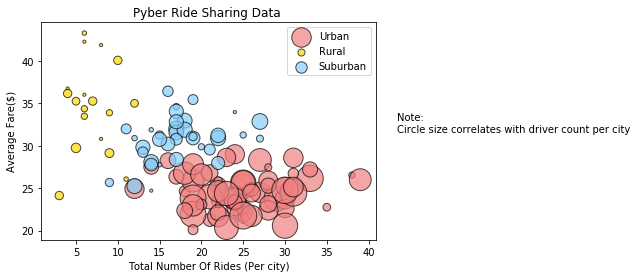

In [21]:
# scatter plots for each city type
plt.scatter(urban_total_rides, urban_avg_fare,s= urban_total_drivers*10,marker ='o',
            facecolors ="lightcoral", edgecolors='black',alpha = 0.7, label="Urban")

plt.scatter(rural_total_rides, rural_avg_fare,s=rural_total_drivers*10,marker ='o',
            facecolors ="gold", edgecolors='black',alpha = 0.7, label="Rural")

plt.scatter(suburban_total_rides, suburban_avg_fare,s= suburban_total_drivers*10,marker ='o',
            facecolors ="lightskyblue", edgecolors='black',alpha = 0.7, label="Suburban")




# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data ")
plt.xlabel("Total Number Of Rides (Per city)")
plt.ylabel("Average Fare($)")
plt.legend(loc = "best")
plt.figtext(.95, .5, "Note:\nCircle size correlates with driver count per city")

# Show plot
plt.show()

# Total Fares by City Type

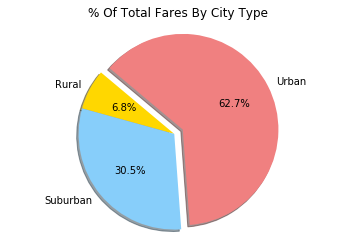

In [32]:
# % of Total Fares by City Type
# Calculate Type Percents
type_city = combined_file.groupby(['type'])['fare'].sum()
#type_city


# Build Pie Chart

#Gold, Light Sky Blue, and Light Coral

cityType = ["Rural","Suburban","Urban"]

explode = (0, 0, 0.1)
colors= ['Gold', 'LightSkyBlue', 'LightCoral']
plt.pie(type_city, explode=explode, labels = cityType, colors = colors,
         autopct= "%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% Of Total Fares By City Type')
plt.show()

# Total Rides by City Type

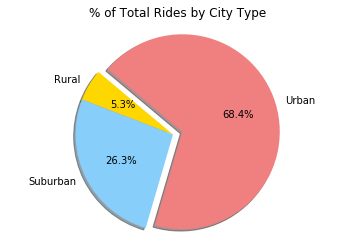

In [34]:

# % of Total Rides by City Type

type_city = combined_file.groupby(['type'])['ride_id'].count()

#Gold, Light Sky Blue, and Light Coral

cityType = ['Rural','Suburban','Urban']

explode = (0, 0, 0.1)
colors= ['Gold', 'LightSkyBlue', 'LightCoral']
plt.pie(type_city, explode=explode, labels= cityType,colors = colors, 
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.show()

# Total Drivers by City Type

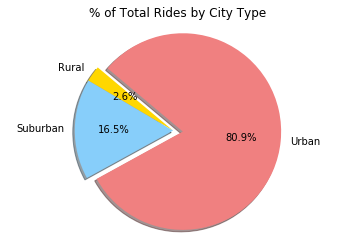

In [35]:
# % of Total Drivers by City Type
type_city = unique_cities.groupby(['type'])['driver_count'].sum()

#Gold, Light Sky Blue, and Light Coral

cityType = ['Rural','Suburban','Urban']

explode = (0, 0, 0.1)
colors= ['Gold', 'LightSkyBlue', 'LightCoral']
plt.pie(type_city, explode=explode, labels= cityType,colors = colors, 
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title('% of Total Rides by City Type')
plt.show()